In [3]:
import pandas as pd
trxn=pd.read_csv("C:/Users/Anushka/Downloads/Retail_Data_Transactions.csv")
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
import pandas as pd
trxn=pd.read_csv("C:/Users/Anushka/Downloads/Retail_Data_Transactions.csv")
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
response=pd.read_csv("C:/Users/Anushka/Downloads/Retail_Data_Response.csv")
response


,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df=trxn.merge(response, on ='customer_id', how='left')

In [7]:
df=trxn.merge(response, on ='customer_id', how='left')

In [8]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [9]:
df.dtypes
df.shape

(125000, 4)

In [10]:
df.describe()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [11]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [12]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')
df

C:\Users\Anushka\AppData\Local\Temp\ipykernel_31664\1197527399.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])


KeyboardInterrupt: 

In [ ]:
set(df['response'])

In [14]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [15]:
from scipy import stats
import numpy as np

#calc z score
z_scores=np.abs(stats.zscore(df['tran_amount']))

#set a threshold
threshold=3

outliers= z_scores>threshold

print(a[outliers])


KeyboardInterrupt



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['tran_amount'])
plt.show

In [16]:
#creating new columns
df['month']=df['trans_date'].dt.month
df

AttributeError: Can only use .dt accessor with datetimelike values

In [17]:
#which 3  monts have had the highest trns amount?

monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002A6FC7BD160>>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "C:\ProgramData\anaconda3\Lib\threading.py", line 1479, in enumerate
    def enumerate():
KeyboardInterrupt: 


KeyError: 'month'

In [18]:
#customer having highest num of orders

customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

#sort 
top_five_cus= customer_counts.sort_values(by='count',ascending=False).head(5)
top_five_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
7,CS2620,35
5,CS3013,35


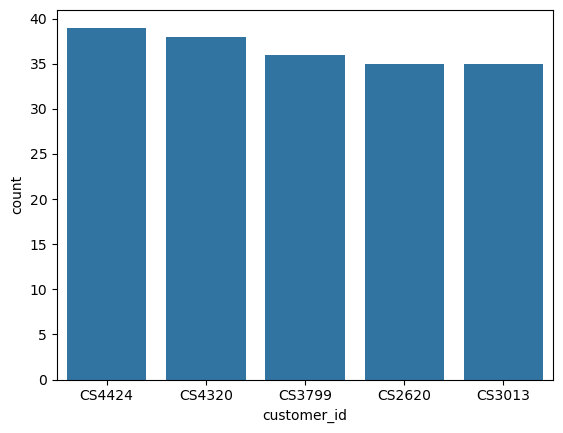

In [53]:
sns.barplot(x='customer_id',y='count',data=top_five_cus)
plt.show()

In [19]:
#customer having highest values of orders

customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#sort 
top_five_sal= customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_five_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


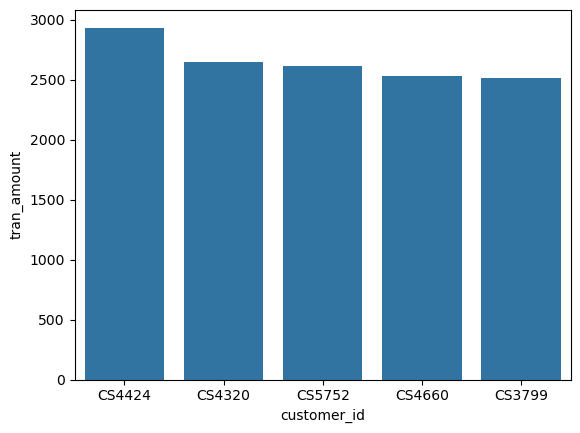

In [57]:
sns.barplot(x='customer_id',y='tran_amount',data=top_five_sal)
plt.show()

C:\Users\Anushka\AppData\Local\Temp\ipykernel_31664\3246053000.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\Anushka\AppData\Local\Temp\ipykernel_31664\3246053000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\Anushka\AppData\Local\Temp\ipykernel_31664\3246053000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

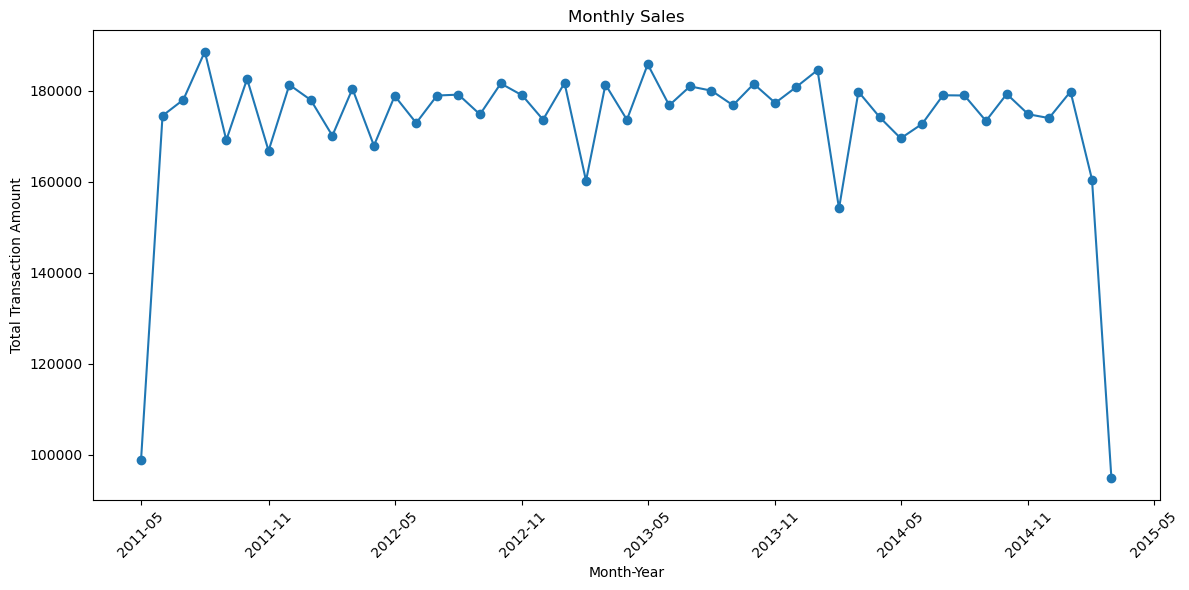

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# make sure trans_date is real datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# safely add month_year
df.loc[:, 'month_year'] = df['trans_date'].dt.to_period('M')

# group and sum
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# convert PeriodIndex to timestamps for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Amount')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
#cohort segmentation
recency=df.groupby('customer_id')['trans_date'].max()
#frequency
frequency=df.groupby('customer_id')['trans_date'].count()
#monetary
monetary=df.groupby('customer_id')['tran_amount'].sum()
#combine
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})


In [28]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [29]:
#customer segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row ['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif(2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return'P2'

rfm['segment']=rfm.apply(segment_customer,axis=1)
        


In [30]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: xlabel='response'>

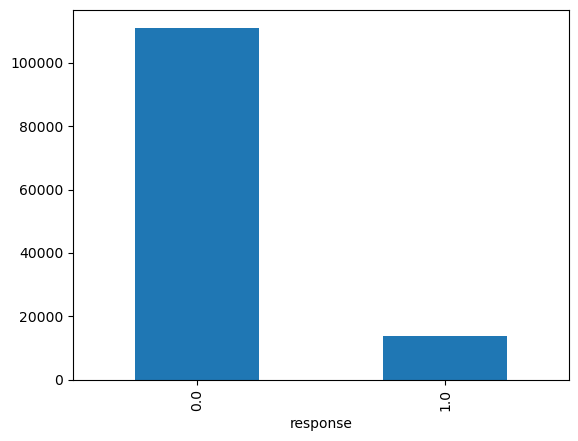

In [34]:
#churn analysis
#count the number of churned and active customers
churn_counts=df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')


<Axes: xlabel='month_year'>

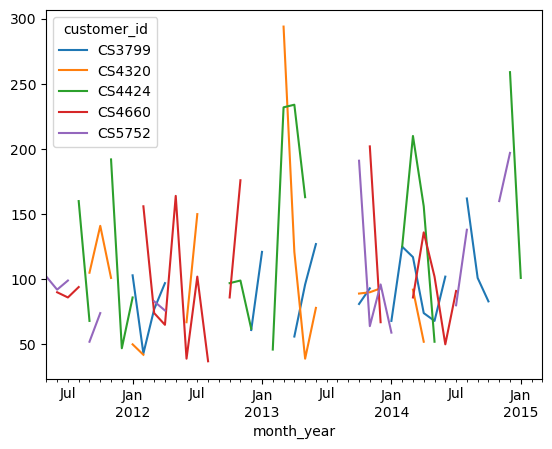

In [35]:
#Analyzing top customer

top_5_cus=monetary.sort_values(ascending=False).head(5).index
top_customers_df=df[df['customer_id'].isin(top_5_cus)]

top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')
                

In [42]:
df.to_csv('Maindata.csv')


In [41]:
rfm.to_csv('AddtionalAnalysis.csv')

#Look for high value frequent buyers


C:\Users\Anushka\AppData\Local\Temp\ipykernel_31664\319979689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='segment', palette='viridis')


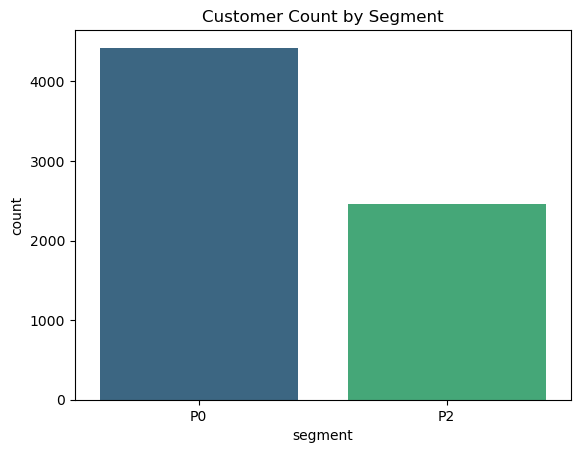

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=rfm, x='segment', palette='viridis')
plt.title("Customer Count by Segment")
plt.show()

Understand the spread of recency,frequency and monetary values

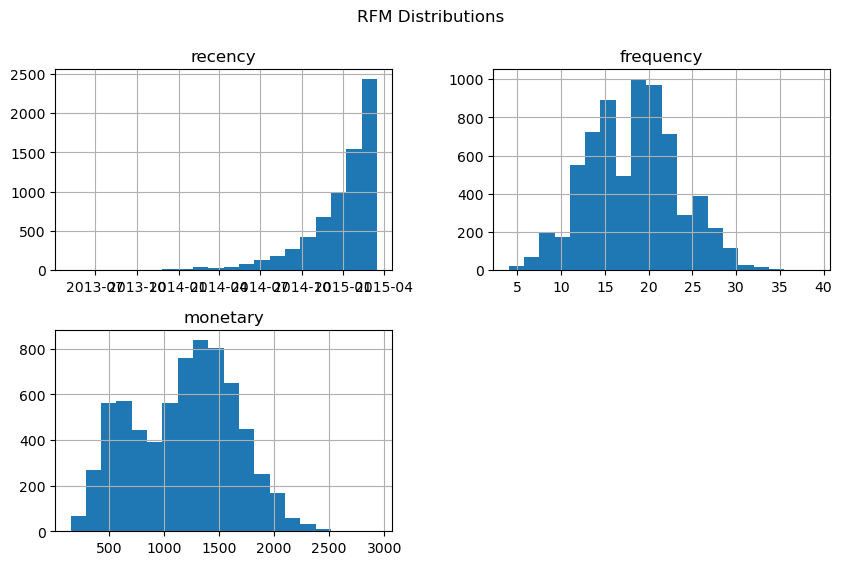

In [44]:
rfm[['recency','frequency','monetary']].hist(bins=20, figsize=(10,6))
plt.suptitle("RFM Distributions")
plt.show()

See how spending (monetary)varies across segment

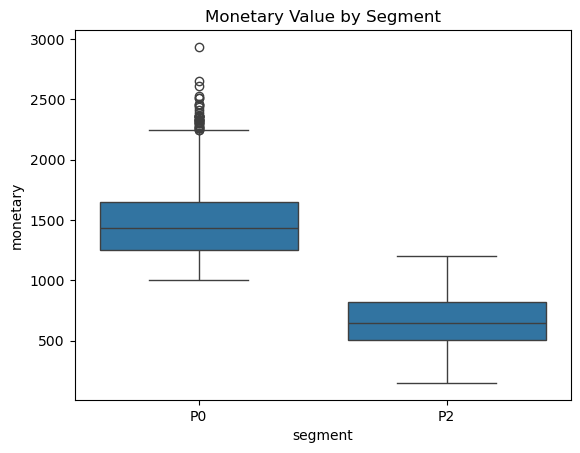

In [45]:
sns.boxplot(data=rfm, x='segment', y='monetary')
plt.title("Monetary Value by Segment")
plt.show()

Look for the high-value frequent buyers

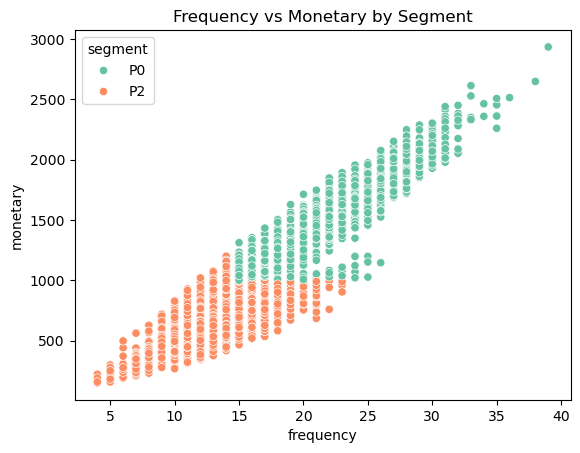

In [46]:
sns.scatterplot(data=rfm, x='frequency', y='monetary', hue='segment', palette='Set2')
plt.title("Frequency vs Monetary by Segment")
plt.show()

Check the relation among the recency,frequency and monetary

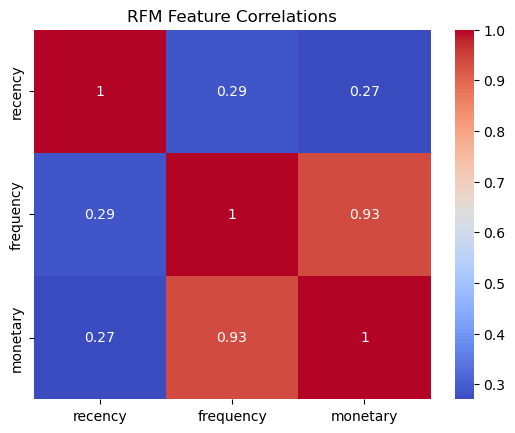

In [47]:
sns.heatmap(rfm[['recency','frequency','monetary']].corr(), annot=True, cmap='coolwarm')
plt.title("RFM Feature Correlations")
plt.show()